In [1]:
import os 
import pandas as pd
import numpy as np

In [6]:
os.chdir("C:\\Users\\Chand\\Downloads\\Assignment1")

In [8]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [9]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [33]:
df.state_1.unique()

array(['GUJ', 'ORI', 'CHTSD', 'MP', 'JRKD', 'WB', 'AP', 'MH', 'D&D',
       'D&NH', 'MIZ', 'TRPR', 'MANPR', 'ASSM', 'MEG', 'NAG', 'A&N',
       'PNDCRY', 'TN', 'GOA', 'KA', 'KE', 'LKSDP', 'SKM', 'Bhr', 'UP',
       'RJ', 'ARP', 'DL', 'HR', 'Pun', 'HP', 'UT', 'Chandr', 'J$K'],
      dtype=object)

In [34]:
Mizoram = df[df['state_1']=="MIZ"]

In [35]:
Mizoram.isnull().sum().sort_values(ascending = False)

soyabean_v         1536
soyabean_q         1536
Land_Leased_out    1517
Meals_School       1508
Meals_Employer     1496
                   ... 
bhindi_q              0
chillig_q             0
palak_q               0
carrot_q              0
fv_tot                0
Length: 384, dtype: int64

In [36]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [38]:
MZ_new = Mizoram[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [39]:
MZ_new.isnull().sum().sort_values(ascending = False)

state_1             0
District            0
Sector              0
Region              0
State_Region        0
ricetotal_q         0
wheattotal_q        0
moong_q             0
Milktotal_q         0
chicken_q           0
bread_q             0
foodtotal_q         0
Beveragestotal_v    0
Meals_At_Home       0
dtype: int64

In [40]:
MZ_clean = MZ_new.copy()

In [41]:
MZ_clean.loc[:, 'Meals_At_Home'] = MZ_clean['Meals_At_Home'].fillna(MZ_new['Meals_At_Home'].mean())

In [42]:
MZ_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

# Outlier Checking

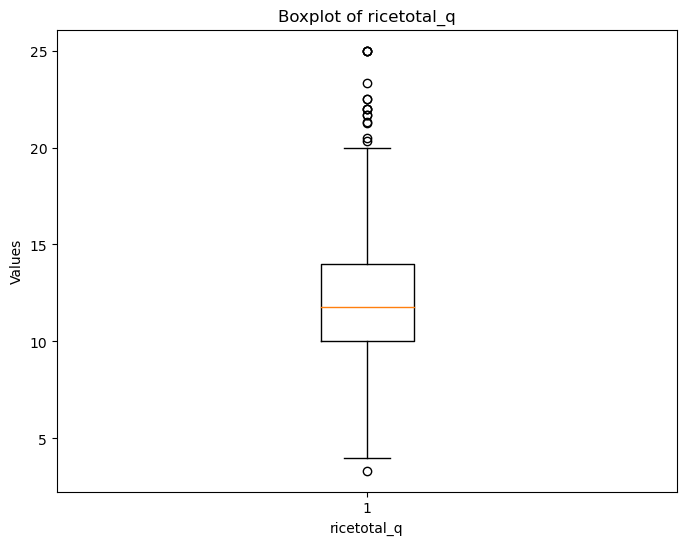

In [43]:
import matplotlib.pyplot as plt
# Assuming MZ_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(MZ_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [44]:
rice1 = MZ_clean['ricetotal_q'].quantile(0.25)
rice2 = MZ_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [45]:
MZ_clean=MZ_new[(MZ_new['ricetotal_q']<=up_limit)&(MZ_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x19700d79e50>,
 'caps': [<matplotlib.lines.Line2D at 0x19700d7b1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19700d794d0>],
 'medians': [<matplotlib.lines.Line2D at 0x19700d59150>],
 'fliers': [<matplotlib.lines.Line2D at 0x19700d257d0>],
 'means': []}

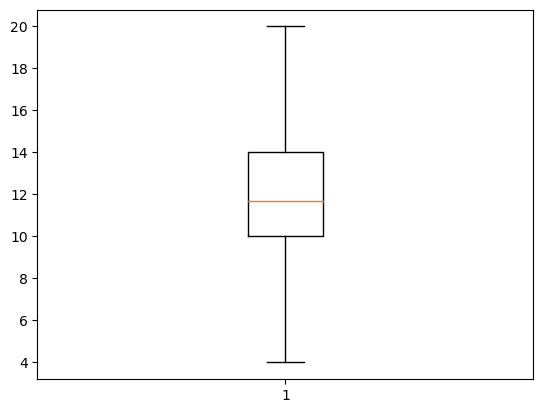

In [46]:
plt.boxplot(MZ_clean['ricetotal_q'])

In [47]:
MZ_clean['District'].unique()

array([5, 3, 4, 6, 8, 2, 1, 7], dtype=int64)

In [48]:
# Replace values in the 'Sector' column
MZ_clean.loc[:,'Sector'] = MZ_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [ ]:
#total consumption

In [50]:
MZ_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [53]:
MZ_clean.loc[:, 'total_consumption'] = MZ_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

C:\Users\Chand\AppData\Local\Temp\ipykernel_5160\2469891472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MZ_clean.loc[:, 'total_consumption'] = MZ_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)


In [54]:
MZ_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
14581,MIZ,5,RURAL,1,151,11.5,0.0,0.0,0,0.0,0.0,26.150425,75.016750,60.0,112.667175
14582,MIZ,5,RURAL,1,151,14.0,0.0,0.0,0,0.0,0.0,26.333717,73.360000,60.0,113.693717
14583,MIZ,5,RURAL,1,151,14.0,0.0,0.0,0,0.0,0.0,21.714536,64.285714,60.0,100.000250
14584,MIZ,5,RURAL,1,151,12.5,0.0,0.0,0,0.0,0.0,18.900725,50.000000,60.0,81.400725
14585,MIZ,5,RURAL,1,151,14.0,0.0,0.0,0,0.0,0.0,22.150217,33.333333,60.0,69.483550


In [55]:
MZ_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                
                     std       mean       max        min
Region                                                  
1              33.336697  66.123427  262.1517  18.125375

In [56]:
MZ_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                30.512021  58.097936  221.133850  20.290060
2                27.342637  64.671109  173.970920  27.333550
3                39.089556  71.123278  262.151700  18.125375
4                29.357248  62.174005  175.053975  19.533417
5                23.307330  65.793569  132.997979  28.003433
6                22.617188  64.163548  138.600580  21.600150
7                34.368719  58.191981  189.325488  20.934375
8                36.459862  65.172039  191.056668  22.750133

In [57]:
total_consumption_by_districtcode=MZ_clean.groupby('District')['total_consumption'].sum()

In [58]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
3    42958.460200
6    15912.559962
4    11937.408986
Name: total_consumption, dtype: float64

In [59]:
from statsmodels.stats import weightstats as stests

In [60]:
rural=MZ_clean[MZ_clean['Sector']=="RURAL"]
urban=MZ_clean[MZ_clean['Sector']=="URBAN"]

In [61]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
14581,MIZ,5,RURAL,1,151,11.5,0.0,0.0,0,0.0,0.0,26.150425,75.016750,60.0,112.667175
14582,MIZ,5,RURAL,1,151,14.0,0.0,0.0,0,0.0,0.0,26.333717,73.360000,60.0,113.693717
14583,MIZ,5,RURAL,1,151,14.0,0.0,0.0,0,0.0,0.0,21.714536,64.285714,60.0,100.000250
14584,MIZ,5,RURAL,1,151,12.5,0.0,0.0,0,0.0,0.0,18.900725,50.000000,60.0,81.400725
14585,MIZ,5,RURAL,1,151,14.0,0.0,0.0,0,0.0,0.0,22.150217,33.333333,60.0,69.483550


In [62]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
46437,MIZ,3,URBAN,1,151,10.000000,0.0,0.0,0,0.166667,1.000000,19.700443,16.666667,60.0,47.533777
46438,MIZ,3,URBAN,1,151,10.000000,0.0,0.0,0,0.000000,0.800000,20.228370,16.000000,90.0,47.028370
46439,MIZ,3,URBAN,1,151,7.500000,0.0,0.0,0,0.250000,1.000000,19.433007,22.500000,90.0,50.683008
46440,MIZ,3,URBAN,1,151,10.000000,0.0,0.0,0,0.000000,1.200000,22.822532,12.007000,90.0,46.029532
46441,MIZ,3,URBAN,1,151,8.333333,0.0,0.0,0,0.000000,0.666667,16.523750,10.011667,90.0,35.535417


In [63]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [64]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 7.620621784877728
P-Value: 2.5245665015280363e-14
